In [1]:
import pandas as pd
from importlib import reload

from src import constants as C
from src.statistics import participant_scan_patterns as P
from src.viz import visualisations_scan_patterns as PV

reload(P)
reload(PV)

<module 'src.viz.visualisations_scan_patterns' from 'C:\\Users\\deeth\\PycharmProjects\\QA_eyetracking\\src\\viz\\visualisations_scan_patterns.py'>

In [2]:
hunters = pd.read_csv("../data/hunters.csv")
gatherers = pd.read_csv("../data/gatherers.csv")

In [3]:
results = P.run_trial_preference_screening(
    hunters,
    gatherers,
    metric=C.MEAN_FIRST_FIXATION_DURATION,
    uniform_rel_range=0.10,
    save=True,
)

hunters_trials = results["hunters"]
gatherers_trials = results["gatherers"]

In [4]:
print("Hunters:")
print(P.compute_global_preference_stats(hunters_trials))


Hunters:
   total_trials  n_uniform  n_mismatch  n_matching  prop_uniform  \
0          9719         24        4617        5078      0.002469   

   prop_mismatch  prop_matching  
0       0.475049       0.522482  


In [5]:
print("\nGatherers:")
print(P.compute_global_preference_stats(gatherers_trials))


Gatherers:
   total_trials  n_uniform  n_mismatch  n_matching  prop_uniform  \
0          9717         24        4984        4709       0.00247   

   prop_mismatch  prop_matching  
0       0.512916       0.484615  


In [6]:
hunters_pp = P.compute_participant_preference_summary(hunters_trials)
gatherers_pp = P.compute_participant_preference_summary(gatherers_trials)

corr_hunters = P.correctness_by_group(hunters_trials)
corr_gatherers = P.correctness_by_group(gatherers_trials)

print("\nHunters correctness:")
print(corr_hunters)

print("\nGatherers correctness:")
print(corr_gatherers)



Hunters correctness:
  pref_group  correct_rate  n_trials  n_correct
0   matching         0.880      5078       4469
1   mismatch         0.858      4617       3963
2    uniform         0.708        24         17

Gatherers correctness:
  pref_group  correct_rate  n_trials  n_correct
0   matching         0.817      4709       3847
1   mismatch         0.808      4984       4026
2    uniform         0.708        24         17



METRIC = IA_AVERAGE_FIX_PUPIL_SIZE | uniform_rel_range = 0.10
Hunters pref stats:
   total_trials  n_uniform  n_mismatch  n_matching  prop_uniform  \
0          8096       5336        1971         789      0.659091   

   prop_mismatch  prop_matching  
0       0.243454       0.097456  

Gatherers pref stats:
   total_trials  n_uniform  n_mismatch  n_matching  prop_uniform  \
0          8292       5250        2157         885       0.63314   

   prop_mismatch  prop_matching  
0        0.26013       0.106729  


C:\Users\deeth\PycharmProjects\QA_eyetracking\src\viz\visualisations_scan_patterns.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("pref_group")[Con.IS_CORRECT_COLUMN]


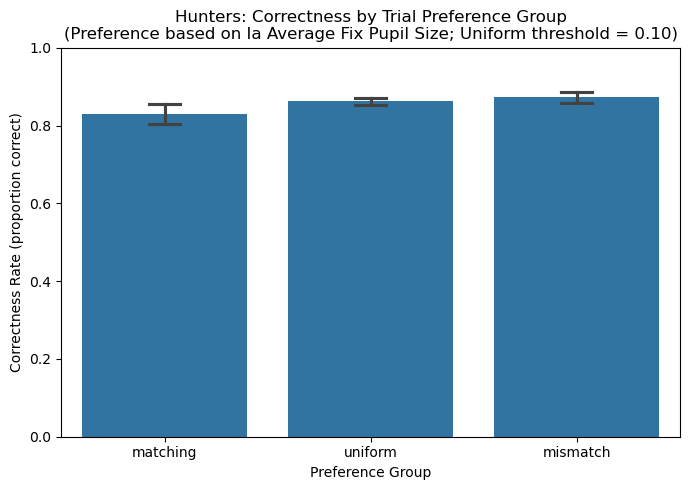

C:\Users\deeth\PycharmProjects\QA_eyetracking\src\viz\visualisations_scan_patterns.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("pref_group")[Con.IS_CORRECT_COLUMN]


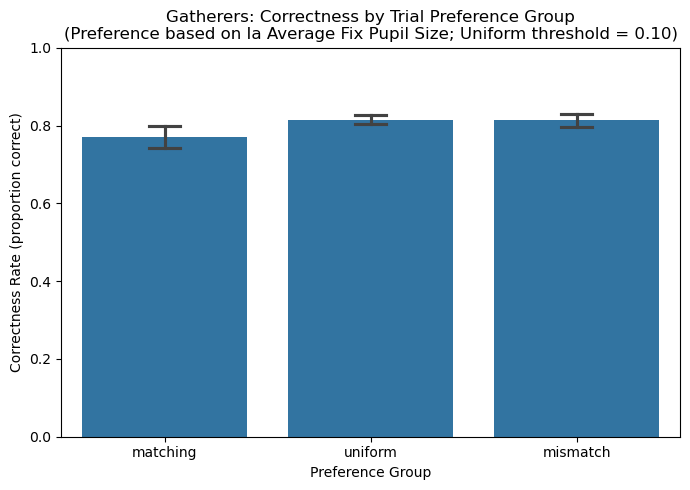


METRIC = IA_AVERAGE_FIX_PUPIL_SIZE | uniform_rel_range = 0.15
Hunters pref stats:
   total_trials  n_uniform  n_mismatch  n_matching  prop_uniform  \
0          8096       6514        1154         428      0.804595   

   prop_mismatch  prop_matching  
0        0.14254       0.052866  

Gatherers pref stats:
   total_trials  n_uniform  n_mismatch  n_matching  prop_uniform  \
0          8292       6490        1310         492      0.782682   

   prop_mismatch  prop_matching  
0       0.157984       0.059334  


C:\Users\deeth\PycharmProjects\QA_eyetracking\src\viz\visualisations_scan_patterns.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("pref_group")[Con.IS_CORRECT_COLUMN]


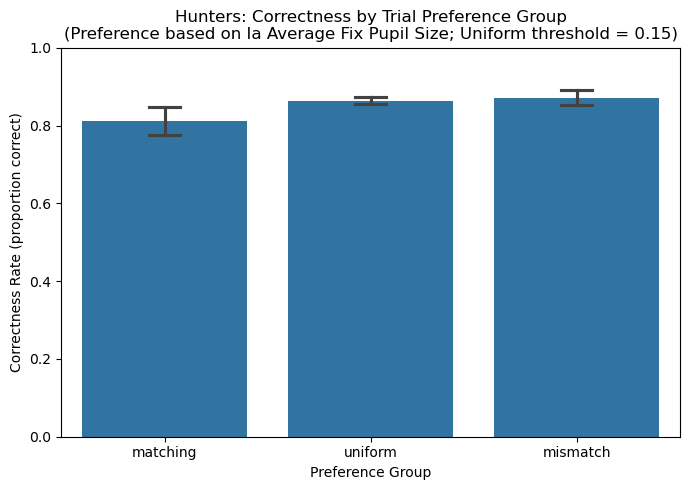

C:\Users\deeth\PycharmProjects\QA_eyetracking\src\viz\visualisations_scan_patterns.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("pref_group")[Con.IS_CORRECT_COLUMN]


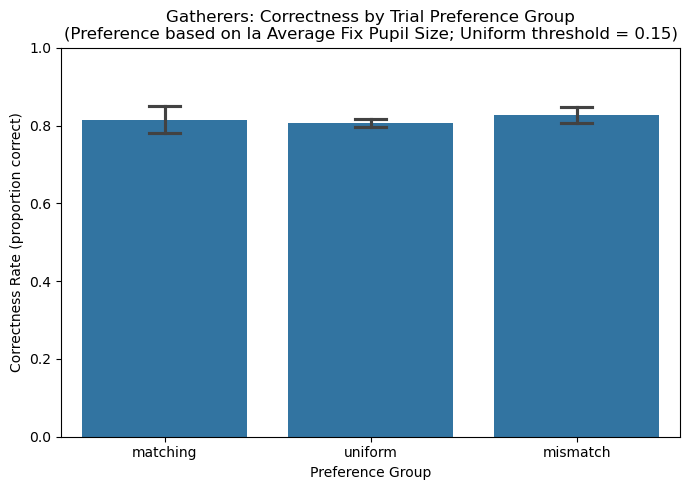


METRIC = IA_AVERAGE_FIX_PUPIL_SIZE | uniform_rel_range = 0.20
Hunters pref stats:
   total_trials  n_uniform  n_mismatch  n_matching  prop_uniform  \
0          8096       7250         611         235      0.895504   

   prop_mismatch  prop_matching  
0       0.075469       0.029027  

Gatherers pref stats:
   total_trials  n_uniform  n_mismatch  n_matching  prop_uniform  \
0          8292       7333         701         258      0.884346   

   prop_mismatch  prop_matching  
0       0.084539       0.031114  


C:\Users\deeth\PycharmProjects\QA_eyetracking\src\viz\visualisations_scan_patterns.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("pref_group")[Con.IS_CORRECT_COLUMN]


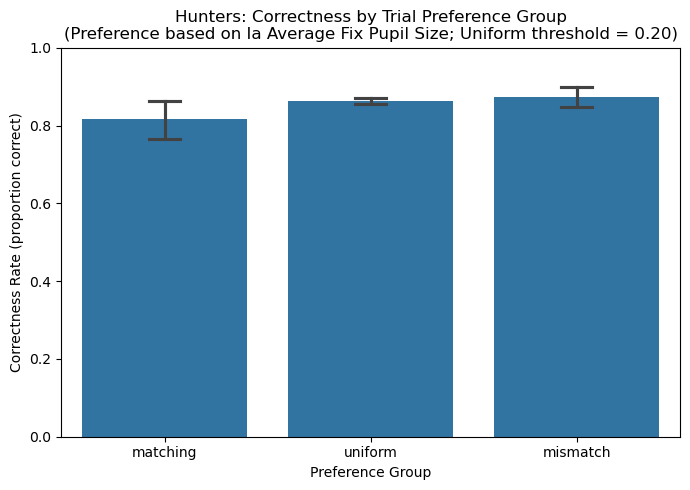

C:\Users\deeth\PycharmProjects\QA_eyetracking\src\viz\visualisations_scan_patterns.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("pref_group")[Con.IS_CORRECT_COLUMN]


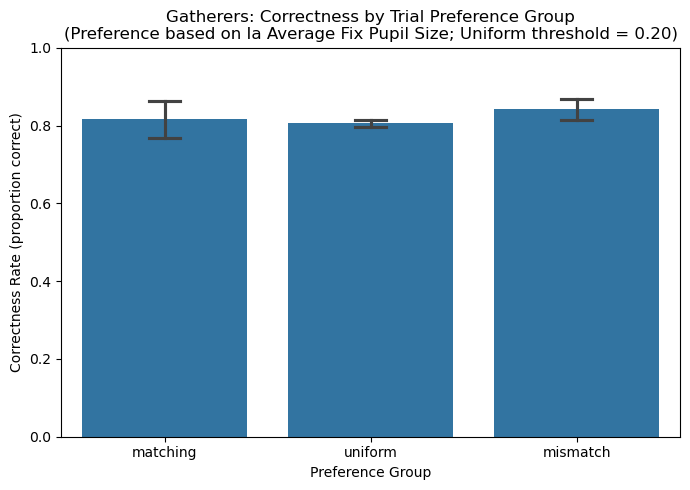

In [7]:
thresholds = [0.10, 0.15, 0.20]
#metrics = C.AREA_METRIC_COLUMNS
metrics = [C.IA_AVERAGE_FIX_PUPIL_SIZE]

all_corr = []

for metric in metrics:
    for thr in thresholds:
        print("\n" + "=" * 80)
        print(f"METRIC = {metric} | uniform_rel_range = {thr:.2f}")
        print("=" * 80)

        results = P.run_trial_preference_screening(
            hunters,
            gatherers,
            metric=metric,
            uniform_rel_range=thr,
            save=True,
        )

        hunters_pref = results["hunters"]
        gatherers_pref = results["gatherers"]

        print("Hunters pref stats:")
        print(P.compute_global_preference_stats(hunters_pref))

        print("\nGatherers pref stats:")
        print(P.compute_global_preference_stats(gatherers_pref))

        if C.IS_CORRECT_COLUMN in hunters_pref.columns:
            corr_h = P.correctness_by_group(hunters_pref).assign(group="hunters", metric=metric, uniform_rel_range=thr)
            corr_g = P.correctness_by_group(gatherers_pref).assign(group="gatherers", metric=metric, uniform_rel_range=thr)
            all_corr.append(corr_h)
            all_corr.append(corr_g)

            PV.plot_correctness_by_group(hunters_pref, label="Hunters", metric=metric, uniform_rel_range=thr, save=True)
            PV.plot_correctness_by_group(gatherers_pref, label="Gatherers", metric=metric, uniform_rel_range=thr, save=True)
        else:
            print(f"NOTE: {C.IS_CORRECT_COLUMN} not present; skipping correctness + plots.")


if all_corr:
    corr_summary = pd.concat(all_corr, ignore_index=True)
    corr_summary

In [8]:
hunters_merged = hunters.copy()
hunters_merged["group"] = "hunters"

gatherers_merged = gatherers.copy()
gatherers_merged["group"] = "gatherers"

merged = pd.concat([hunters_merged, gatherers_merged], ignore_index=True)



MERGED | METRIC = IA_AVERAGE_FIX_PUPIL_SIZE | uniform_rel_range = 0.10
Merged pref stats:
   total_trials  n_uniform  n_mismatch  n_matching  prop_uniform  \
0         16388      10586        4128        1674       0.64596   

   prop_mismatch  prop_matching                     metric  uniform_rel_range  
0       0.251892       0.102148  IA_AVERAGE_FIX_PUPIL_SIZE                0.1  


C:\Users\deeth\PycharmProjects\QA_eyetracking\src\viz\visualisations_scan_patterns.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("pref_group")[Con.IS_CORRECT_COLUMN]


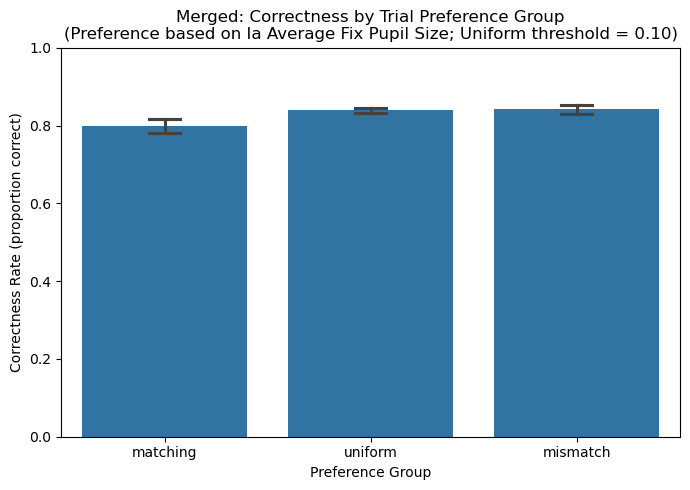


MERGED | METRIC = IA_AVERAGE_FIX_PUPIL_SIZE | uniform_rel_range = 0.15
Merged pref stats:
   total_trials  n_uniform  n_mismatch  n_matching  prop_uniform  \
0         16388      13004        2464         920      0.793507   

   prop_mismatch  prop_matching                     metric  uniform_rel_range  
0       0.150354       0.056139  IA_AVERAGE_FIX_PUPIL_SIZE               0.15  


C:\Users\deeth\PycharmProjects\QA_eyetracking\src\viz\visualisations_scan_patterns.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("pref_group")[Con.IS_CORRECT_COLUMN]


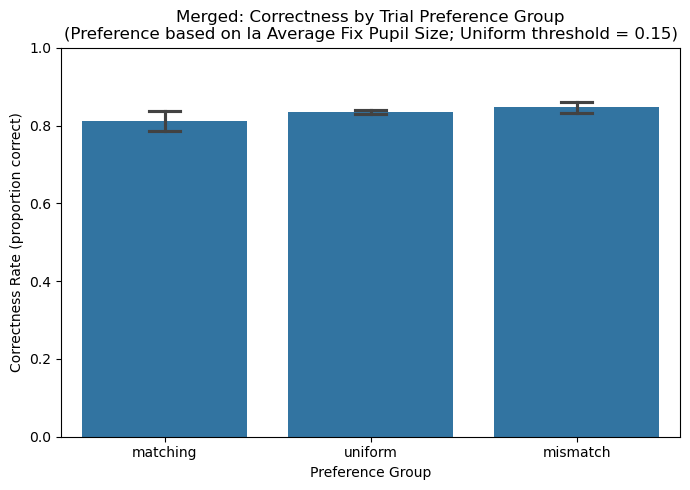


MERGED | METRIC = IA_AVERAGE_FIX_PUPIL_SIZE | uniform_rel_range = 0.20
Merged pref stats:
   total_trials  n_uniform  n_mismatch  n_matching  prop_uniform  \
0         16388      14583        1312         493      0.889858   

   prop_mismatch  prop_matching                     metric  uniform_rel_range  
0       0.080059       0.030083  IA_AVERAGE_FIX_PUPIL_SIZE                0.2  


C:\Users\deeth\PycharmProjects\QA_eyetracking\src\viz\visualisations_scan_patterns.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("pref_group")[Con.IS_CORRECT_COLUMN]


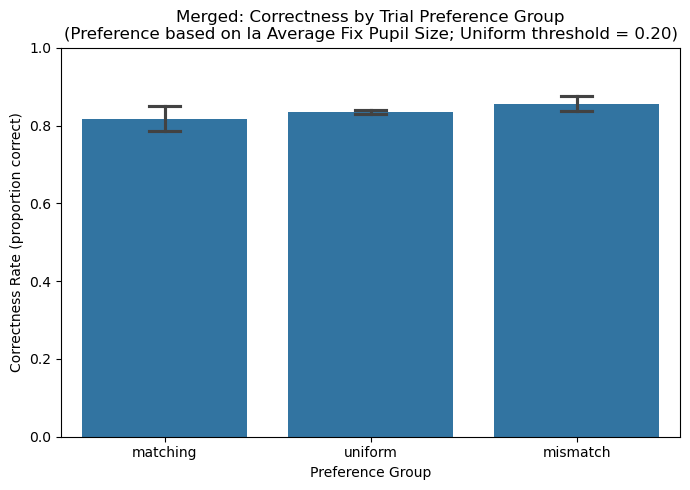

(   total_trials  n_uniform  n_mismatch  n_matching  prop_uniform  \
 0         16388      10586        4128        1674      0.645960   
 1         16388      13004        2464         920      0.793507   
 2         16388      14583        1312         493      0.889858   
 
    prop_mismatch  prop_matching                     metric  uniform_rel_range  
 0       0.251892       0.102148  IA_AVERAGE_FIX_PUPIL_SIZE               0.10  
 1       0.150354       0.056139  IA_AVERAGE_FIX_PUPIL_SIZE               0.15  
 2       0.080059       0.030083  IA_AVERAGE_FIX_PUPIL_SIZE               0.20  ,
   pref_group  correct_rate  n_trials  n_correct                     metric  \
 0   matching         0.799      1674       1337  IA_AVERAGE_FIX_PUPIL_SIZE   
 1   mismatch         0.841      4128       3473  IA_AVERAGE_FIX_PUPIL_SIZE   
 2    uniform         0.839     10586       8882  IA_AVERAGE_FIX_PUPIL_SIZE   
 3   matching         0.812       920        747  IA_AVERAGE_FIX_PUPIL_SIZE   
 4

In [9]:
thresholds = [0.10, 0.15, 0.20]
#metrics = C.AREA_METRIC_COLUMNS
metrics = [C.IA_AVERAGE_FIX_PUPIL_SIZE]

all_corr = []
all_pref_stats = []

for metric in metrics:
    for thr in thresholds:
        print("\n" + "=" * 80)
        print(f"MERGED | METRIC = {metric} | uniform_rel_range = {thr:.2f}")
        print("=" * 80)

        merged_pref = P.compute_trial_preference_stats(
            merged,
            metric=metric,
            uniform_rel_range=thr,
        )

        pref_stats = P.compute_global_preference_stats(merged_pref)
        pref_stats["metric"] = metric
        pref_stats["uniform_rel_range"] = thr
        all_pref_stats.append(pref_stats)

        print("Merged pref stats:")
        print(pref_stats)

        if C.IS_CORRECT_COLUMN in merged_pref.columns:
            corr = P.correctness_by_group(merged_pref)
            corr["metric"] = metric
            corr["uniform_rel_range"] = thr
            corr["group"] = "merged"
            all_corr.append(corr)

            PV.plot_correctness_by_group(
                merged_pref,
                label="Merged",
                metric=metric,
                uniform_rel_range=thr,
                save=True,
            )
        else:
            print(f"NOTE: {C.IS_CORRECT_COLUMN} not present; skipping correctness + plots.")

pref_summary = pd.concat(all_pref_stats, ignore_index=True) if all_pref_stats else None
corr_summary = pd.concat(all_corr, ignore_index=True) if all_corr else None

pref_summary, corr_summary

In [12]:
from src.statistics.preference_correctness_tests import pairwise_correctness_tests

stat_metrics = C.AREA_METRIC_COLUMNS

all_stats = []

for metric in stat_metrics:
    #for thr in [0.15]:
    for thr in [0.10, 0.15, 0.20]:
        results = P.run_trial_preference_screening(
            hunters,
            gatherers,
            metric=metric,
            uniform_rel_range=thr,
            save=True,
        )

        # hunters
        all_stats.append(
            pairwise_correctness_tests(
                results["hunters"],
                metric=metric,
                uniform_rel_range=thr,
                group_label="hunters",
            )
        )

        # gatherers
        all_stats.append(
            pairwise_correctness_tests(
                results["gatherers"],
                metric=metric,
                uniform_rel_range=thr,
                group_label="gatherers",
            )
        )

stats_summary = pd.concat(all_stats, ignore_index=True)
stats_summary


,metric,uniform_rel_range,group,comparison,g1,g2,test_used,test_stat,p_value,correct_rate_g1,correct_rate_g2,delta_correctness,n_trials_g1,n_trials_g2,n_correct_g1,n_correct_g2,p_fdr,significant
0,mean_dwell_time,0.1,hunters,matching_vs_uniform,matching,uniform,fisher,0.504464,1.000000,0.8760,0.9333,-0.0574,6192,15,5424,14,1.000000,False
1,mean_dwell_time,0.1,hunters,matching_vs_mismatch,matching,mismatch,chi2,6.837183,0.008928,0.8760,0.8573,0.0186,6192,3512,5424,3011,0.026784,True
2,mean_dwell_time,0.1,hunters,uniform_vs_mismatch,uniform,mismatch,fisher,2.329459,0.710391,0.9333,0.8573,0.0760,15,3512,14,3011,1.000000,False
3,mean_dwell_time,0.1,gatherers,matching_vs_uniform,matching,uniform,fisher,0.907707,1.000000,0.8194,0.8333,-0.0139,5893,12,4829,10,1.000000,False
4,mean_dwell_time,0.1,gatherers,matching_vs_mismatch,matching,mismatch,chi2,5.518634,0.018815,0.8194,0.8004,0.0191,5893,3812,4829,3051,0.056445,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,first_encounter_avg_pupil_size,0.2,hunters,matching_vs_mismatch,matching,mismatch,chi2,1.488123,0.222508,0.8563,0.8770,-0.0207,494,1788,423,1568,0.452581,False
158,first_encounter_avg_pupil_size,0.2,hunters,uniform_vs_mismatch,uniform,mismatch,chi2,0.995581,0.318382,0.8681,0.8770,-0.0088,7423,1788,6444,1568,0.452581,False
159,first_encounter_avg_pupil_size,0.2,gatherers,matching_vs_uniform,matching,uniform,chi2,4.284217,0.038468,0.8356,0.8002,0.0354,584,7106,488,5686,0.057702,False
160,first_encounter_avg_pupil_size,0.2,gatherers,matching_vs_mismatch,matching,mismatch,chi2,0.486905,0.485311,0.8356,0.8475,-0.0119,584,2013,488,1706,0.485311,False


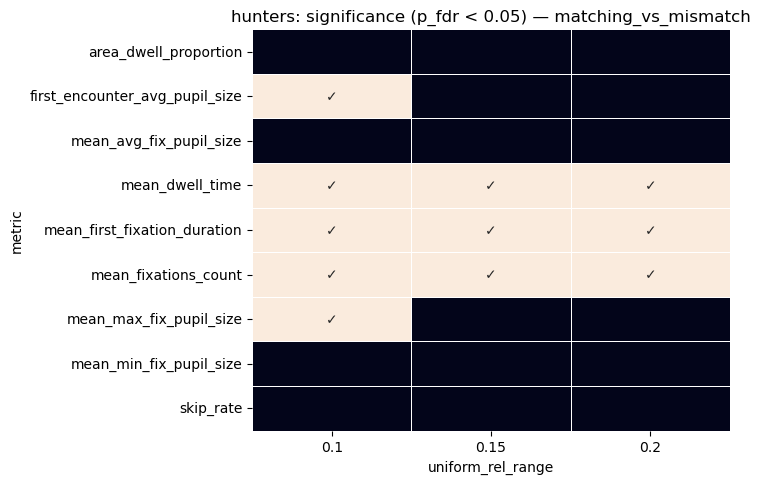

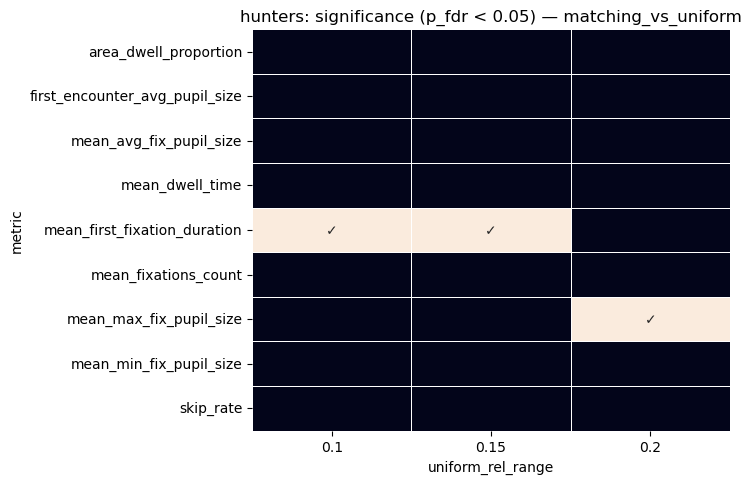

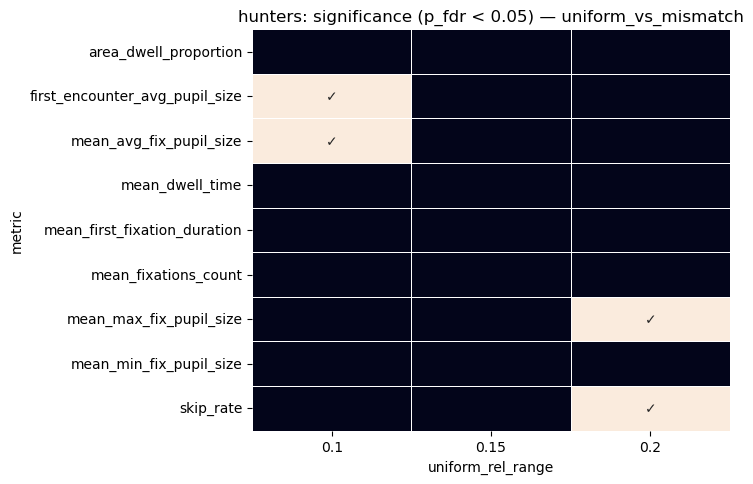

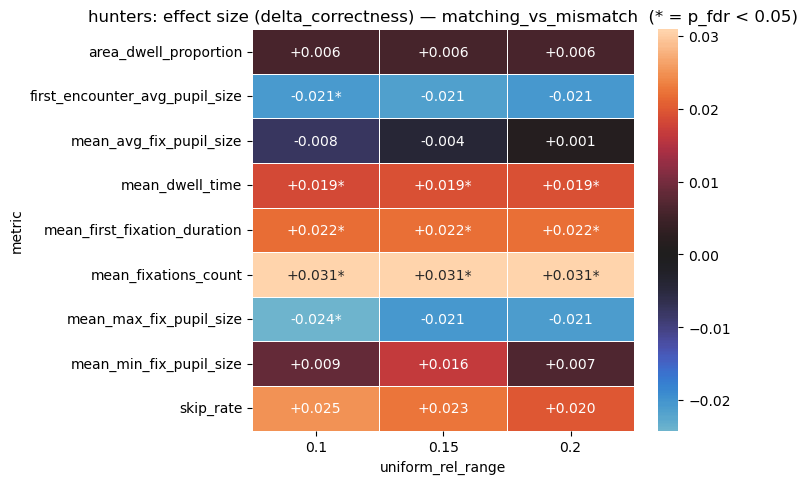

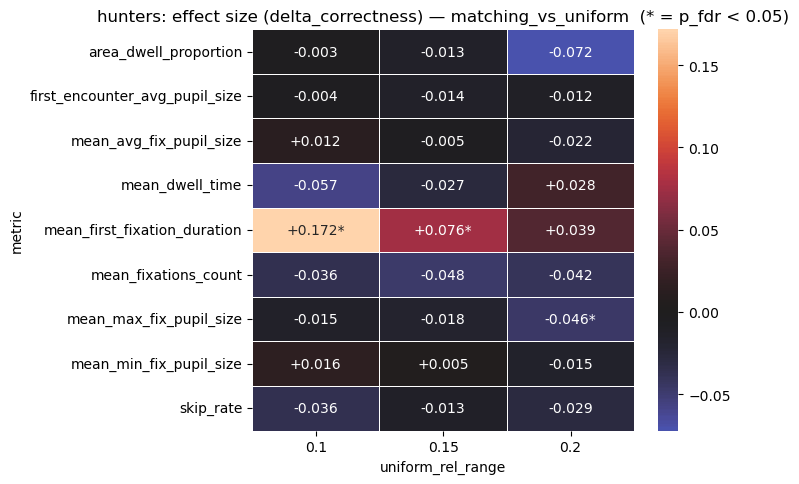

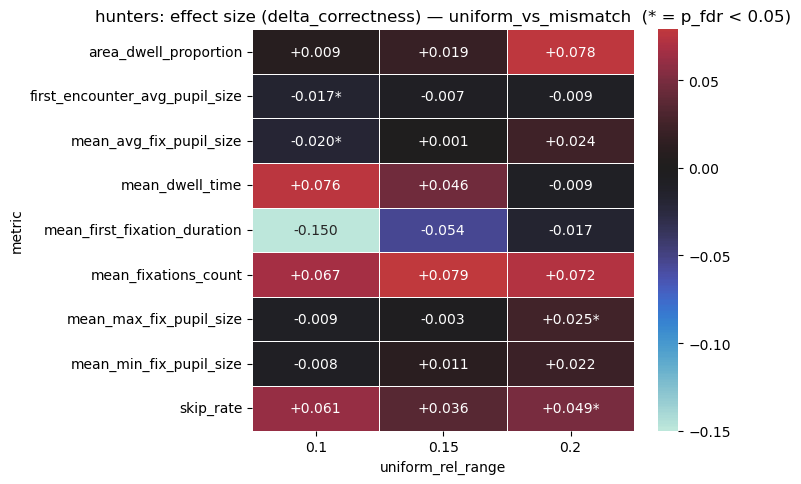

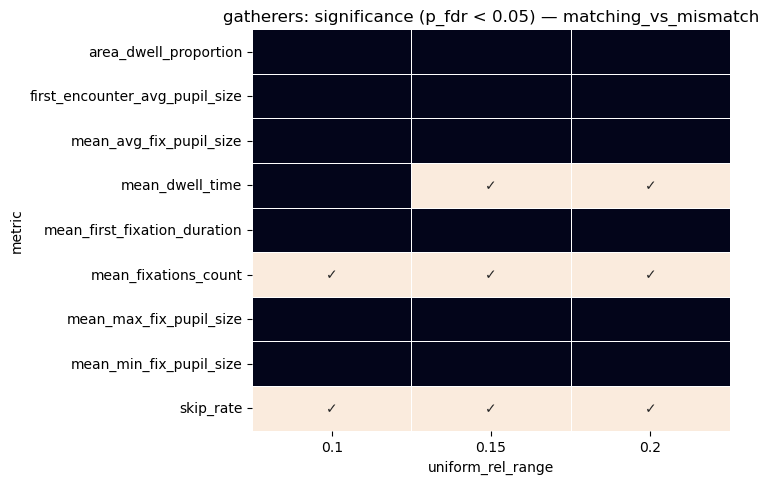

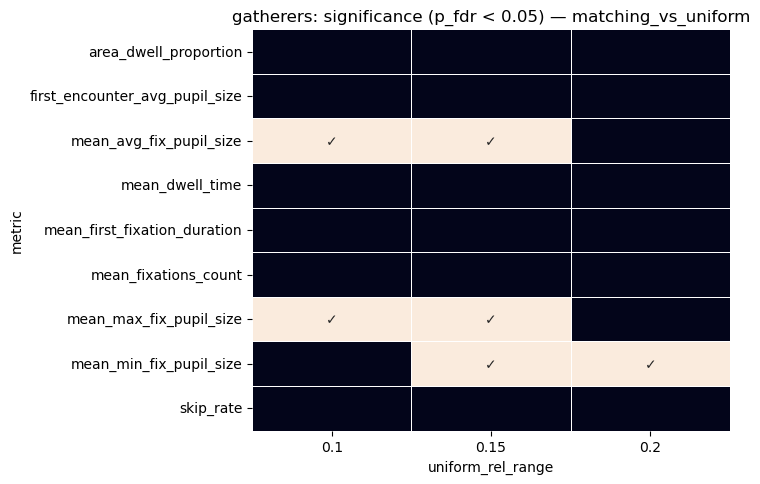

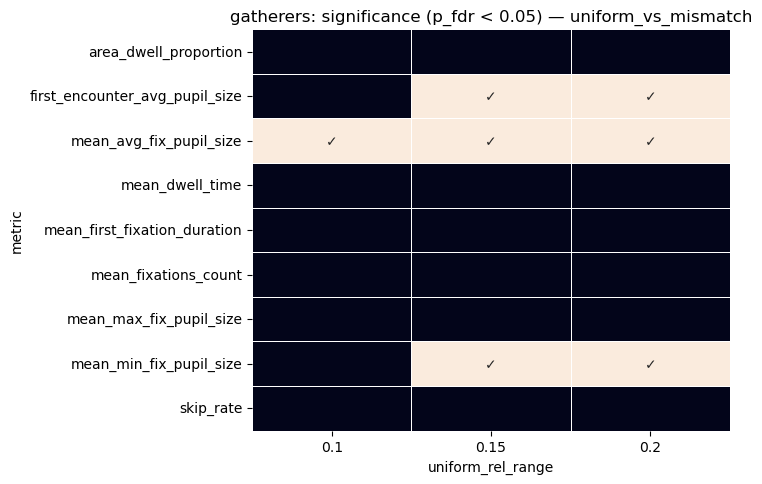

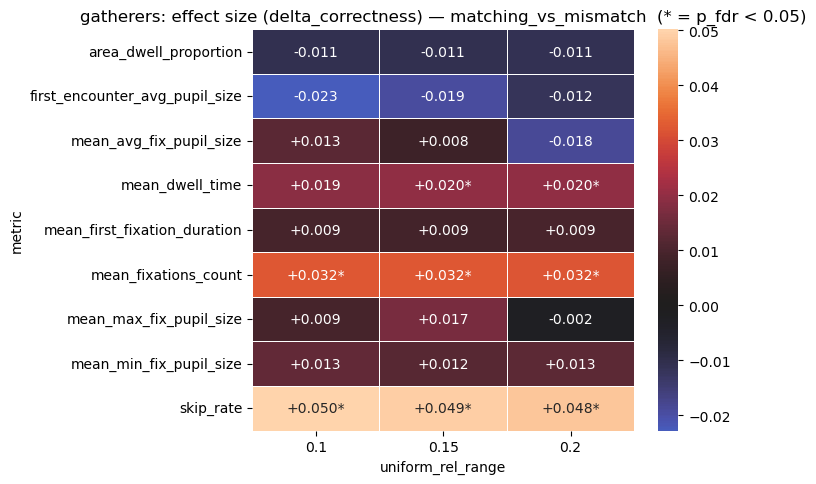

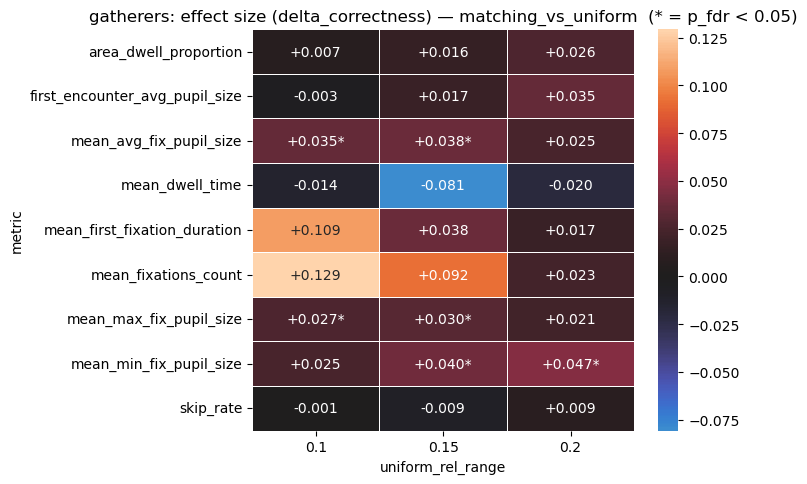

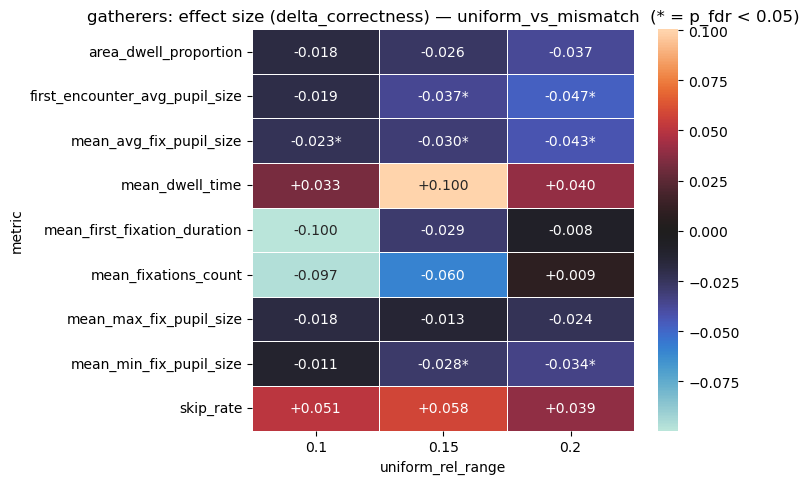

In [13]:
from src.viz.visualisations_preference_correctness_tests import (
    plot_pairwise_correctness_significance_heatmaps,
    plot_pairwise_correctness_effect_heatmaps,
)

stats_summary["uniform_rel_range"] = stats_summary["uniform_rel_range"].astype(float).round(2)
plot_pairwise_correctness_significance_heatmaps(
    stats_summary,
    group="hunters",
    use_p="p_fdr",
    alpha=0.05,
    save=True,
)

plot_pairwise_correctness_effect_heatmaps(
    stats_summary,
    group="hunters",
    signif_col="p_fdr",
    alpha=0.05,
    save=True,
)

# repeat for gatherers / merged
plot_pairwise_correctness_significance_heatmaps(stats_summary, group="gatherers", save=True)
plot_pairwise_correctness_effect_heatmaps(stats_summary, group="gatherers", save=True)

# plot_pairwise_correctness_significance_heatmaps(stats_summary, group="merged", save=True)
# plot_pairwise_correctness_effect_heatmaps(stats_summary, group="merged", save=True)
